<a href="https://colab.research.google.com/github/nahyun-song/pf_game/blob/main/project_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🕹Data Description
--------------------------
`Name` : 게임의 이름입니다.

`Platform` : 게임이 지원되는 플랫폼의 이름입니다.

`Year` : 게임이 출시된 연도입니다.

`Genre` : 게임의 장르입니다.

`Publisher` : 게임을 제작한 회사입니다.

`NA_Sales` : 북미지역에서의 출고량입니다.

`EU_Sales` : 유럽지역에서의 출고량입니다.

`JP_Sales` : 일본지역에서의 출고량입니다.

`Other_Sales` : 기타지역에서의 출고량입니다.

- 게임 관련 데이터를 분석하여 '다음 분기에 어떤 게임을 설계해야 할까'라는 질문에 답을 찾아보자

# 1. 데이터 전처리

In [1]:
#데이터 불러오기
import pandas as pd
df = pd.read_csv('https://url.kr/bemvwq')
df = df.drop(df.columns[0], axis=1)
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [2]:
# 나라별 판매량 단위 통일하기
# M문자 제거
def dlt_M(string):
  return str(string.replace('M',''))

df['NA_Sales'] = df['NA_Sales'].apply(dlt_M)
df['EU_Sales'] = df['EU_Sales'].apply(dlt_M)
df['JP_Sales'] = df['JP_Sales'].apply(dlt_M)
df['Other_Sales'] = df['Other_Sales'].apply(dlt_M)

df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [3]:
# K 문자 제거 후 백만으로 단위 통일 & 나머지 sales데이터들도 float으로 type 변경
def dlt_K(string):
  return float(string.replace('K','')) / 1000

NK_data = df.loc[df['NA_Sales'].str.contains('K')]

NK_data = NK_data.copy()
NK_data['NA_Sales'] = NK_data['NA_Sales'].apply(dlt_K)  

df = df.drop(NK_data.index)
df['NA_Sales'] = df['NA_Sales'].astype('float64')
df = pd.concat([df,NK_data])

In [4]:
EK_data = df.loc[df['EU_Sales'].str.contains('K')]

EK_data = EK_data.copy()
EK_data['EU_Sales'] = EK_data['EU_Sales'].apply(dlt_K)

df = df.drop(EK_data.index)
df['EU_Sales'] = df['EU_Sales'].astype('float64')
df = pd.concat([df,EK_data])

In [5]:
JK_data = df.loc[df['JP_Sales'].str.contains('K')]

JK_data = JK_data.copy()
JK_data['JP_Sales'] = JK_data['JP_Sales'].apply(dlt_K)

df = df.drop(JK_data.index)
df['JP_Sales'] = df['JP_Sales'].astype('float64')
df = pd.concat([df,JK_data])

In [6]:
OK_data = df.loc[df['Other_Sales'].str.contains('K')]

OK_data = OK_data.copy()
OK_data['Other_Sales'] = OK_data['Other_Sales'].apply(dlt_K)

df = df.drop(OK_data.index)
df['Other_Sales'] = df['Other_Sales'].astype('float64')
df = pd.concat([df,OK_data])

In [7]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [8]:
#연도데이터 정리
df_sub1 = df[(df['Year']<22)] # 2000년 이후의 년도들
df = df.drop(df_sub1.index)

df_sub2 = df[(df['Year']<100)] # 2000년 이전의 년도들
df = df.drop(df_sub2.index)

df_sub1['Year'] = df_sub1['Year'] + 2000
df_sub2['Year'] = df_sub2['Year'] + 1900

df = pd.concat([df, df_sub1, df_sub2])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
11334,Super Fire ProWrestling X,SNES,1995.0,Fighting,Human Entertainment,0.00,0.00,0.28,0.00
14572,S.C.A.R.S,PS,1998.0,Racing,Ubisoft,0.05,0.03,0.00,0.01
14785,GOTHA: Ismailia Seneki,SAT,1995.0,Strategy,Sega,0.00,0.00,0.08,0.00
15985,Sugoi Hebereke,SNES,1994.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00


In [9]:
year = df['Year'].unique()
min(year), max(year)

(1980.0, 2020.0)

In [10]:
#연도를 10년 단위 연대로 나눔
#결측치는 모두 'Unknown' 으로 배정 -> 결측치를 0으로 채워 0~1980 구간에 포함되도록 함
df['Year'].fillna(0, inplace=True)

df['Year_cut'] = pd.cut(df['Year'], [0, 1980, 1990, 2000, 2010, 2022] , 
                         labels=['unknown', '1980s', '1990s', '2000s', '2010s~'], right= False , include_lowest= True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,2000s
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2000s
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010s~
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010s~
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010s~
...,...,...,...,...,...,...,...,...,...,...
11334,Super Fire ProWrestling X,SNES,1995.0,Fighting,Human Entertainment,0.00,0.00,0.28,0.00,1990s
14572,S.C.A.R.S,PS,1998.0,Racing,Ubisoft,0.05,0.03,0.00,0.01,1990s
14785,GOTHA: Ismailia Seneki,SAT,1995.0,Strategy,Sega,0.00,0.00,0.08,0.00,1990s
15985,Sugoi Hebereke,SNES,1994.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00,1990s


In [11]:
# index정리하고 column별 type 확인
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16598 non-null  object  
 1   Platform     16598 non-null  object  
 2   Year         16598 non-null  float64 
 3   Genre        16548 non-null  object  
 4   Publisher    16540 non-null  object  
 5   NA_Sales     16598 non-null  float64 
 6   EU_Sales     16598 non-null  float64 
 7   JP_Sales     16598 non-null  float64 
 8   Other_Sales  16598 non-null  float64 
 9   Year_cut     16598 non-null  category
dtypes: category(1), float64(5), object(4)
memory usage: 1.2+ MB


In [12]:
#결측치 확인
print(df.isnull().sum())
print('-------------------')
print('연도를 모르는 데이터의 비율')
print(df['Year_cut'].isin(['unknown']).value_counts(normalize=True))

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Year_cut        0
dtype: int64
-------------------
연도를 모르는 데이터의 비율
False    0.983673
True     0.016327
Name: Year_cut, dtype: float64


# 2. 지역에 따라서 선호하는 게임 장르가 다를까

In [13]:
#지역별 시장규모 확인
g_scale = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
g_scale.sum()

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

In [14]:
import numpy as np
np.arange(len(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']))

array([0, 1, 2, 3])

<BarContainer object of 4 artists>

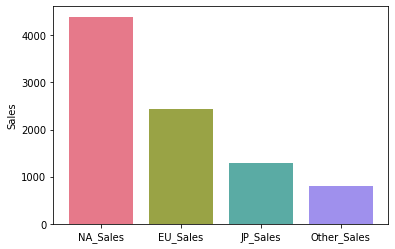

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.xticks(np.arange(4),['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.ylabel('Sales')
plt.bar(np.arange(4),[4392.95, 2434.13, 1291.02, 797.75], label='Geo', color=['#E6798A', '#99A345', '#5AABA4', '#9F90ED'])

In [16]:
#지역에 따른 장르별 출고량 확인
#장르 카테고리에서 결측치를 포함한 행 50개 삭제
gGeo = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
gGeo = gGeo.dropna()
gGeo

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Fighting,0.00,0.00,0.28,0.00
16594,Racing,0.05,0.03,0.00,0.01
16595,Strategy,0.00,0.00,0.08,0.00
16596,Fighting,0.00,0.00,0.02,0.00


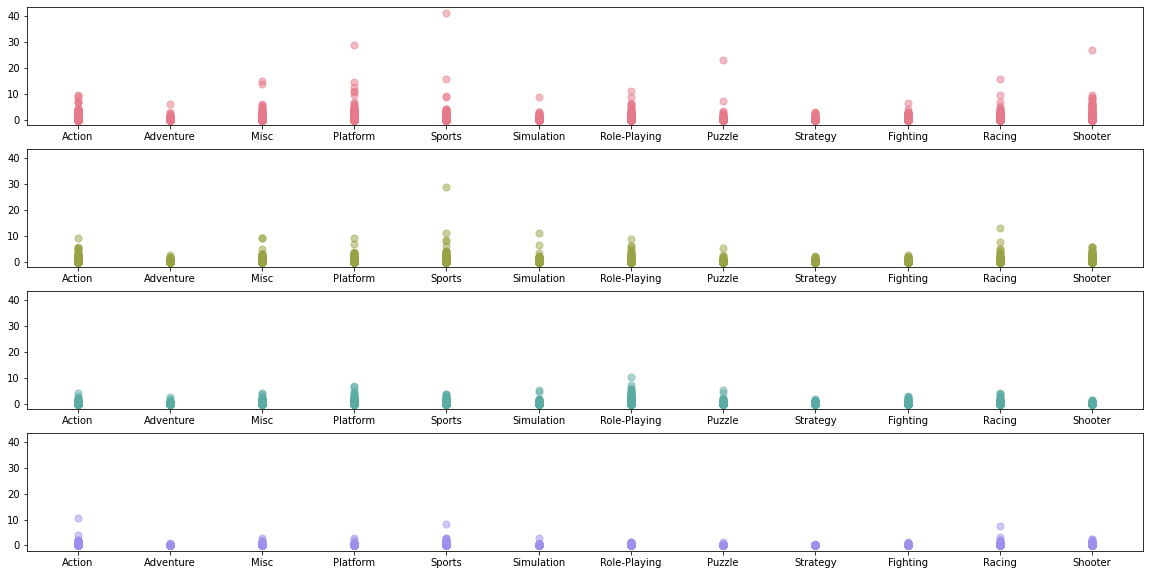

In [17]:
#scatter plot 으로 전체적인 데이터 확인
fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharey=True)
axs[0].scatter(gGeo['Genre'], gGeo['NA_Sales'], s=50, c='#E6798A', alpha=0.5, label='NA_Sales')
axs[1].scatter(gGeo['Genre'], gGeo['EU_Sales'], s=50, c='#99A345', alpha=0.5, label='EU_Sales')
axs[2].scatter(gGeo['Genre'], gGeo['JP_Sales'], s=50, c='#5AABA4', alpha=0.5, label='JP_Sales')
axs[3].scatter(gGeo['Genre'], gGeo['Other_Sales'], s=50, c='#9F90ED', alpha=0.5, label='Other_Sales')

In [18]:
# 장르별 게임수 확인
gGeo['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

- 게임수가 많은 장르에서 출고량이 많을 것 -> 게임수가 가장 적은 장르를 기준으로 샘플 사이즈를 맞춰 분석해보자

In [19]:
def my_samp(i):
  u = gGeo['Genre'].unique()
  s = gGeo[gGeo['Genre'].isin([u[i]])].sample(570)
  return s

for i in range(12) :
  if i == 0 :
    s_gGeo = my_samp(0)
  else :
    s_gGeo = pd.concat([s_gGeo, my_samp(i)])

s_gGeo

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13127,Action,0.64,0.02,0.00,0.10
11305,Action,0.96,0.37,0.00,0.05
8809,Action,0.31,0.19,0.00,0.03
7815,Action,0.02,0.00,0.00,0.00
3439,Action,1.16,0.65,0.08,0.20
...,...,...,...,...,...
2256,Shooter,0.21,0.15,0.00,0.08
12115,Shooter,0.10,0.07,0.00,0.02
5387,Shooter,0.00,0.02,0.00,0.00
8704,Shooter,0.00,0.00,0.18,0.00


In [20]:
#장르-지역별 출고량
s_gGeo = s_gGeo.groupby('Genre').sum()
s_gGeo

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,124.70,74.51,31.78,23.14
Adventure,49.09,28.86,23.71,6.66
Fighting,142.65,62.99,53.94,22.02
Misc,123.01,65.77,30.05,21.47
Platform,254.59,113.58,66.77,27.35
Puzzle,122.05,48.91,55.90,12.13
Racing,150.36,93.19,19.83,34.52
Role-Playing,134.74,84.13,147.79,23.57
Shooter,210.09,119.31,15.86,39.00


In [21]:
#chi square test 로 두 변수사이의 연관성 확인
from scipy.stats import chi2_contingency
chi2_contingency(s_gGeo, correction=False)[1]

2.0307410693970954e-37

- p-value 값이 0.05보다 현저히 작으므로 귀무가설을 기각하고 대안가설 채택 -> 장르와 나라별 출고량 사이의 연관이 있다

####장르별로 크기가 570인 표본집단을 만들어 비교한 결과

전체 시장 크기 : 북미 > 유럽 > 일본 > 그 외\
출고량이 높은 장르 : platform, shooter, sports
일본 시장을 제외한 시장은 대부분 장르별 출고량 추이가 비슷하게 나타남 일본 시장은 타 시장과는 다르게\
롤플레잉에서 장르별 출고량이 현저히 높았고, 레이싱과 슈터에서는 낮았다.

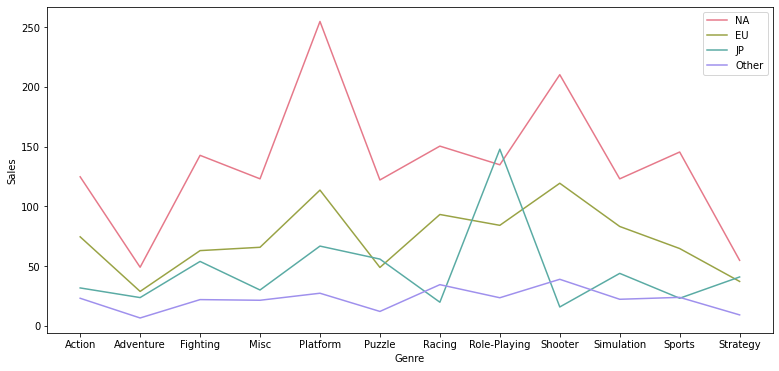

In [22]:
#line plot 으로 시각화
plt.figure(figsize=(13,6)) 


plt.xlabel('Genre')           
plt.ylabel('Sales')

plt.plot(s_gGeo['NA_Sales'], label='NA', c='#E6798A')
plt.plot(s_gGeo['EU_Sales'], label='EU', c='#99A345')
plt.plot(s_gGeo['JP_Sales'], label='JP', c='#5AABA4')
plt.plot(s_gGeo['Other_Sales'], label='Other', c='#9F90ED')



plt.legend(loc=1)

plt.show()

# 3. 연도별 게임의 트렌드가 있을까

In [23]:
#연도-장르
yGP = df[['Genre', 'Year_cut']]
yGP

,Genre,Year_cut
0,Action,2000s
1,Action,2000s
2,Adventure,2010s~
3,Misc,2010s~
4,Platform,2010s~
...,...,...
16593,Fighting,1990s
16594,Racing,1990s
16595,Strategy,1990s
16596,Fighting,1990s


In [24]:
#'Genre'열에 결측치를 포함한 행 제거
yGP = yGP.dropna()
yGP.isnull().sum()

Genre       0
Year_cut    0
dtype: int64

In [25]:
yGP1 = pd.crosstab(yGP['Genre'], yGP['Year_cut'])
yGP2 = yGP1[['1980s', '1990s', '2000s', '2010s~']]
yGP2

Year_cut,1980s,1990s,2000s,2010s~
Genre,,,,
Action,66,161,1579,1436
Adventure,2,97,632,539
Fighting,4,193,442,196
Misc,8,115,1021,561
Platform,33,125,565,151
Puzzle,19,71,361,116
Racing,8,181,797,234
Role-Playing,9,171,729,557
Shooter,30,137,718,395


In [26]:
#두 변수 사이의 연관성 확인
from scipy.stats import chi2_contingency
chi2_contingency(yGP2, correction=False)[1]

3.1625489869983137e-196

- p-value 가 0.05보다 현저히 작으므로 두 변수사이의 연관이 있다

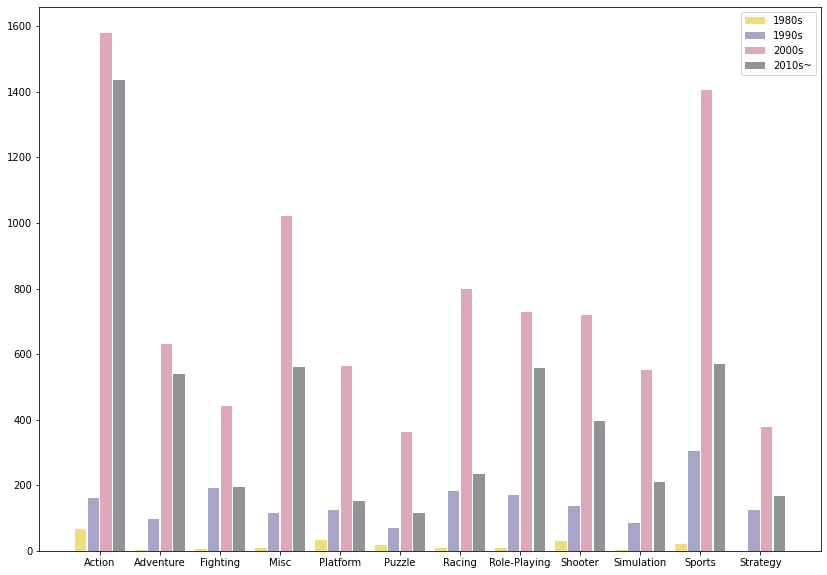

In [27]:
#grouped barplot으로 시각화

def draw_group_barchart(df,main_category,sub_category,fig_width=14,fig_height=10, \
                        between_bar_padding=0.85,\
                        within_bar_padding=0.8, config_bar=None):
    

    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    %matplotlib inline 

 
    num_sub_category = len(sub_category) ## 서브 카테고리 개수

    fig = plt.figure(figsize=(fig_width,fig_height)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 지정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성
    
    colors = ['#EEDD7A', '#A9A5C7', '#DEA7BA', '#939297'] ## 막대기 색상 지정
    
    tick_label = list(df.index) ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    
    tick_coord = np.arange(tick_number) ## 메인 카테고리안에서 첫번째 서브 카테고리 막대기가 그려지는 x좌표
 
    width = 1/num_sub_category*between_bar_padding ## 막대기 폭 지정
 
    config_tick = dict()
    config_tick['ticks'] = [t + width*(num_sub_category-1)/2 for t in tick_coord] ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label 
 

    plt.xticks(**config_tick) ## x축 눈금 라벨 생성

    for i in range(num_sub_category):
        if config_bar: ## 바 차트 추가 옵션이 있는 경우
            ax.bar(tick_coord+width*i, df[sub_category[i]], \
                  width*within_bar_padding, label=sub_category[i], \
                  color=colors[i], **config_bar) ## 수직 바 차트 생성
        else:
            ax.bar(tick_coord+width*i, df[sub_category[i]], \
                  width*within_bar_padding, label=sub_category[i], \
                  color=colors[i]) ## 수직 바 차트 생성
    plt.legend() ## 범례 생성
    plt.show()


main_category = yGP2.index
sub_category = ['1980s', '1990s', '2000s', '2010s~'] 
 
 
draw_group_barchart(yGP2,main_category,sub_category,\
                        between_bar_padding=0.85,\
                        within_bar_padding=0.9, config_bar = None)

연도별 시장 규모는는 2000년대에 가장 크다

- 1980년대에는 액션, 슈터, 플랫폼
- 1990년대에는 스포츠, 파이팅, 레이싱
- 2000년대에는 액션, 스포츠, Misc
- 2010년 이후에는 액션, 스포츠, Misc

### 연도별 플랫폼 확인

In [28]:
yPL = df[['Platform', 'Year_cut']]
yPL1 = pd.crosstab(yPL['Year_cut'], yPL['Platform'])
yPL1 = yPL1.drop('unknown')
yPL1

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year_cut,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980s,116,0,0,0,1,11,0,0,0,0,0,75,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990s,0,3,0,21,0,59,0,0,27,1,246,23,12,38,1,916,0,0,0,0,0,173,6,239,2,2,0,0,0,0,0
2000s,0,0,0,31,1617,27,811,542,0,0,70,0,0,442,0,273,2082,418,0,697,0,0,0,0,0,4,838,0,553,803,0
2010s~,0,0,500,0,515,0,0,0,0,0,0,0,0,461,0,0,45,886,336,500,412,0,0,0,0,0,452,143,682,0,213


In [29]:
#히트맵으로 시각화할 때 알아보기 쉽도록 0값은 결측치로 변경
yPL2 = yPL1.replace({0:''})

for i in range(len(yPL2.columns)) :
  yPL2[yPL2.columns[i]] = pd.to_numeric(yPL2[yPL2.columns[i]])

yPL2

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year_cut,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980s,116.0,NaN,NaN,NaN,1.0,11.0,NaN,NaN,NaN,NaN,NaN,75.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990s,NaN,3.0,NaN,21.0,NaN,59.0,NaN,NaN,27.0,1.0,246.0,23.0,12.0,38,1.0,916.0,NaN,NaN,NaN,NaN,NaN,173.0,6.0,239.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2000s,NaN,NaN,NaN,31.0,1617.0,27.0,811.0,542.0,NaN,NaN,70.0,NaN,NaN,442,NaN,273.0,2082.0,418.0,NaN,697.0,NaN,NaN,NaN,NaN,NaN,4.0,838.0,NaN,553.0,803.0,NaN
2010s~,NaN,NaN,500.0,NaN,515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461,NaN,NaN,45.0,886.0,336.0,500.0,412.0,NaN,NaN,NaN,NaN,NaN,452.0,143.0,682.0,NaN,213.0


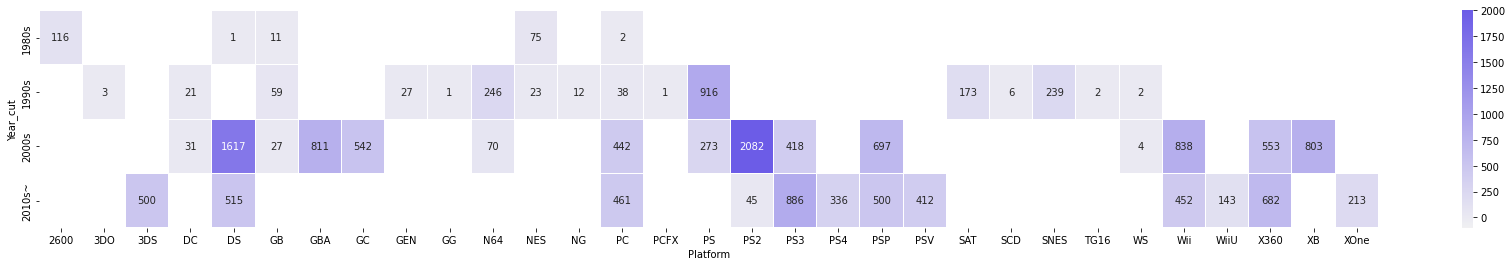

In [30]:
import seaborn as sns

plt.figure(figsize=(30,4))

ax = sns.heatmap(yPL2, vmin=-100, vmax=2000, annot=True, fmt='g', linewidths=.01, cmap=sns.light_palette("#6c5ce7", as_cmap=True))

- Nintendo : 3DS, DC, DS, GB, GBA, GC, N64, NES, SNES, Wii, WiiU
- Sony : PS,  PS2,  PS3,  PS4,  PSP,  PSV
- MS : PC, X360,  XB,  XOne

주요 3사의 플랫폼이 전체 시장의 95%를 차지함

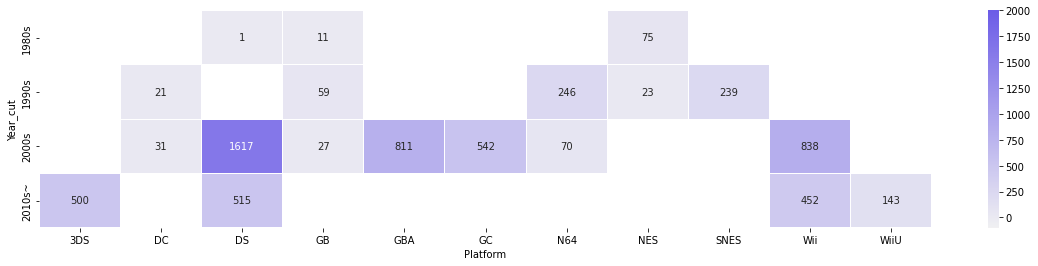

In [35]:
#Nintendo사의 플랫폼과 연대와의 관계
plt.figure(figsize=(20,4))

ax = sns.heatmap(yPL2[['3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'N64', 'NES', 'SNES', 'Wii', 'WiiU']], 
                 vmin=-100, vmax=2000, annot=True, fmt='g', linewidths=.01, cmap=sns.light_palette("#6c5ce7", as_cmap=True))

- Nintendo사의 플랫폼은 80년대부터 꾸준히 이용되고 있고 그 종류도 다양함

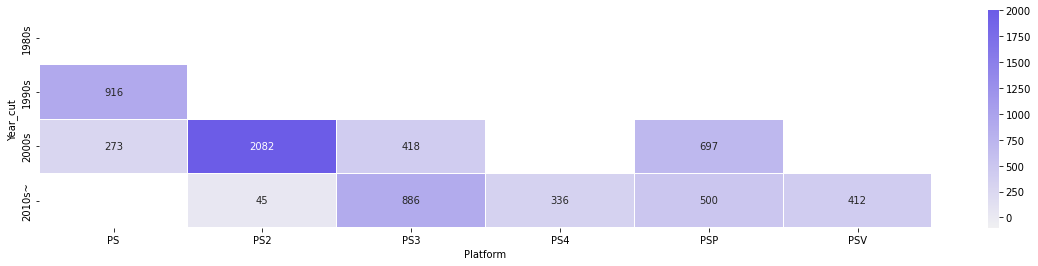

In [36]:
#Sony사의 플랫폼과 연대와의 관계
plt.figure(figsize=(20,4))

ax = sns.heatmap(yPL2[['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']], 
                 vmin=-100, vmax=2000, annot=True, fmt='g', linewidths=.01, cmap=sns.light_palette("#6c5ce7", as_cmap=True))

- Sony사의 플랫폼은 90년대 이후에 출시 됨

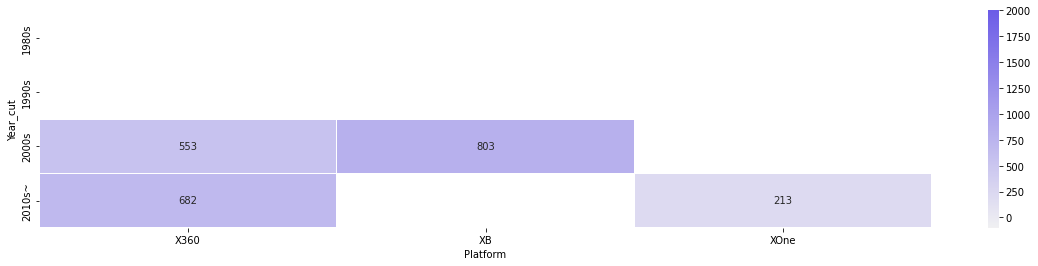

In [37]:
#MS사의 플랫폼과 연대와의 관계
plt.figure(figsize=(20,4))

ax = sns.heatmap(yPL2[['X360', 'XB', 'XOne']], 
                 vmin=-100, vmax=2000, annot=True, fmt='g', linewidths=.01, cmap=sns.light_palette("#6c5ce7", as_cmap=True))

- MS사의 플랫폼은 2000년대 이후에 출시 됨

# 4. 북미,유럽시장 위주 출고량이 높은 게임분석

In [38]:
copy_df = df.copy()
copy_df['Sales'] = copy_df['NA_Sales'] + copy_df['EU_Sales']
s_df = copy_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Year_cut', 'Sales']]

#연도를 모르는 게임들을 출고량 기준으로 내림차순으로 정렬
s_df[s_df.sort_values(by='Sales', ascending=False)['Year_cut'].isin(['unknown'])].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Platform,Year,Genre,Publisher,Year_cut,Sales
30,Rock Band,X360,0.0,Misc,Electronic Arts,unknown,2.27
103,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,0.0,Racing,Unknown,unknown,0.00
262,Jewel Link Chronicles: Mountains of Madness,DS,0.0,Puzzle,Avanquest,unknown,0.06
345,Majesty 2: The Fantasy Kingdom Sim,X360,0.0,Simulation,Unknown,unknown,0.03
416,Famista 64,N64,0.0,Sports,Namco Bandai Games,unknown,0.00


- 아래 데이터 분석에 영향을 주지 않을 수치라고 판단하여 제외하고 분석

In [39]:
#1980년대 출고량 상위 15개
df_1980 = s_df[s_df['Year_cut'].isin(['1980s'])]
df_1980_h = df_1980.sort_values(by='Sales', ascending=False).head(15)
df_1980_h

,Name,Platform,Year,Genre,Publisher,Year_cut,Sales
4090,Super Mario Bros.,NES,1985.0,Platform,Nintendo,1980s,32.66
10164,Duck Hunt,NES,1984.0,Shooter,Nintendo,1980s,27.56
1176,Tetris,GB,1989.0,Puzzle,Nintendo,1980s,25.46
9204,Super Mario Land,GB,1989.0,Platform,Nintendo,1980s,13.54
14420,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,1980s,12.98
5661,Pac-Man,2600,1982.0,Puzzle,Atari,1980s,7.73
16445,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,1980s,6.57
10460,The Legend of Zelda,NES,1986.0,Action,Nintendo,1980s,4.67
15415,Pitfall!,2600,1981.0,Platform,Activision,1980s,4.45
5567,Asteroids,2600,1980.0,Shooter,Atari,1980s,4.26


In [40]:
#1990년대 출고량 상위 15개
df_1990 = s_df[s_df['Year_cut'].isin(['1990s'])]
df_1990_h = df_1990.sort_values(by='Sales', ascending=False).head(15)
df_1990_h

,Name,Platform,Year,Genre,Publisher,Year_cut,Sales
7603,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,1990s,20.16
12725,Super Mario World,SNES,1990.0,Platform,Nintendo,1990s,16.53
9132,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,1990s,15.18
8282,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,1990s,10.93
6275,Super Mario 64,N64,1996.0,Platform,Nintendo,1990s,9.76
6654,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,1990s,8.20
2927,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,1990s,8.14
4685,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,1990s,7.89
11643,GoldenEye 007,N64,1997.0,Shooter,Nintendo,1990s,7.81
562,Mario Kart 64,N64,1996.0,Racing,Nintendo,1990s,7.49


In [41]:
#2000년대 출고량 상위 15개
df_2000 = s_df[s_df['Year_cut'].isin(['2000s'])]
df_2000_h = df_2000.sort_values(by='Sales', ascending=False).head(15)
df_2000_h

,Name,Platform,Year,Genre,Publisher,Year_cut,Sales
2829,Wii Sports,Wii,2006.0,Sports,Nintendo,2000s,70.51
12205,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2000s,28.73
3262,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2000s,26.76
2934,Wii Play,Wii,2006.0,Misc,Nintendo,2000s,23.23
16041,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,2000s,21.65
6741,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,2000s,20.61
10798,Nintendogs,DS,2005.0,Simulation,Nintendo,2000s,20.07
10565,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,2000s,17.68
10321,Mario Kart DS,DS,2005.0,Racing,Nintendo,2000s,17.38
3344,Wii Fit,Wii,2007.0,Sports,Nintendo,2000s,16.97


In [42]:
#2010년대 이후 출고량 상위 15개
df_2010 = s_df[s_df['Year_cut'].isin(['2010s~'])]
df_2010_h = df_2010.sort_values(by='Sales', ascending=False).head(15)

#장르에서 결측치가 하나 존재하는데, 검색해서 찾음
df_2010_h.loc[16116,'Genre']='Role-Playing'	
df_2010_h

,Name,Platform,Year,Genre,Publisher,Year_cut,Sales
4232,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,2010s~,19.91
3389,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,2010s~,16.28
10578,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,2010s~,14.94
6071,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,2010s~,13.40
2734,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,2010s~,13.31
6212,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,2010s~,12.55
8801,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,2010s~,11.58
13717,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,2010s~,11.36
4131,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,2010s~,10.87
9623,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,2010s~,10.42


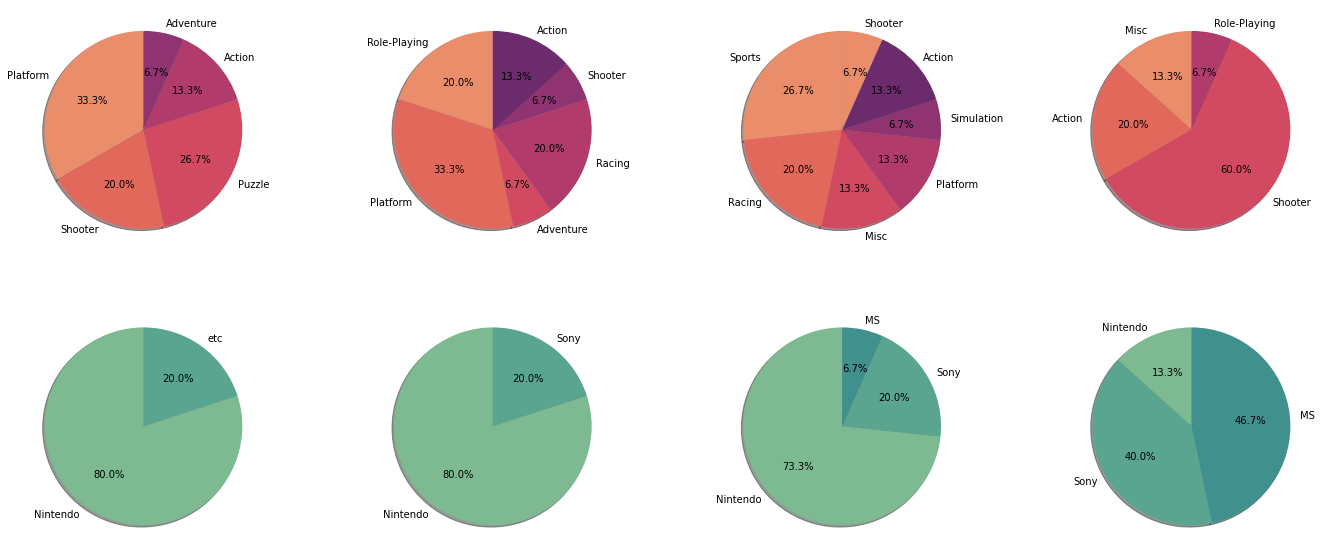

In [48]:
#파이차트로 시각화
fig, axs = plt.subplots(2, 4, figsize=(24, 10), sharey=True)

color_g = sns.color_palette("flare")
color_p = sns.color_palette("crest")

axs[0,0].pie([5,3,4,2,1], explode = [0,0,0,0,0], labels=df_1980_h['Genre'].unique(), autopct='%1.1f%%', shadow=True, startangle=90, colors=color_g)
axs[1,0].pie([12,3], labels=['Nintendo', 'etc'], autopct='%1.1f%%', shadow=True, startangle=90, colors=color_p)
axs[0,1].pie([3,5,1,3,1,2], explode = [0,0,0,0,0,0], labels=df_1990_h['Genre'].unique(), autopct='%1.1f%%', shadow=True, startangle=90, colors=color_g)
axs[1,1].pie([12,3], labels=['Nintendo', 'Sony'], autopct='%1.1f%%', shadow=True, startangle=90, colors=color_p)
axs[0,2].pie([4,3,2,2,1,2,1], explode = [0,0,0,0,0,0,0], labels=df_2000_h['Genre'].unique(), autopct='%1.1f%%', shadow=True, startangle=90, colors=color_g)
axs[1,2].pie([11,3,1], labels=['Nintendo', 'Sony', 'MS'], autopct='%1.1f%%', shadow=True, startangle=90, colors=color_p)
axs[0,3].pie([2,3,9,1], explode = [0,0,0,0], labels=df_2010_h['Genre'].unique(), autopct='%1.1f%%', shadow=True, startangle=90, colors=color_g)
axs[1,3].pie([2,6,7], labels=['Nintendo', 'Sony', 'MS'], autopct='%1.1f%%', shadow=True, startangle=90, colors=color_p)


plt.show()